# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [341]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [344]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [346]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [348]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [353]:
# Check for NaN values

df.isna().any().any()

False

In [355]:
# Check for null values

df.isnull().values.any()

False

The following fields will need to be coerced to a numerical data type
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 14  poutcome        41188 non-null  object

Checking for any null 

 df.isnull().values.any()

or NaN values 

 df.isna().any().any()

returns False, so no values are missing.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [359]:
# What are the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The objective of this exercise is to build a model to predict if a client will subscribe to a term deposit.

Need to transform the objects into numerical values

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [364]:
# The following fields were objects in the bank information section
# 1   job             41188 non-null  object 
# 2   marital         41188 non-null  object 
# 3   education       41188 non-null  object 
# 4   default         41188 non-null  object 
# 5   housing         41188 non-null  object 
# 6   loan            41188 non-null  object 


le = LabelEncoder()
df['job_encoded'] = le.fit_transform(df['job'])
df['marital_encoded'] = le.fit_transform(df['marital'])
df['education_encoded'] = le.fit_transform(df['education'])
df['default_encoded'] = le.fit_transform(df['default'])
df['housing_encoded'] = le.fit_transform(df['housing'])
df['loan_encoded'] = le.fit_transform(df['loan'])
df['y_encoded'] = le.fit_transform(df['y'])

In [366]:
df['y_encoded']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y_encoded, Length: 41188, dtype: int64

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [369]:
# Create training and testing data set from bank information features

X_train, X_test, y_train, y_test = train_test_split(df[['age',\
                                                        'job_encoded',\
                                                        'marital_encoded',\
                                                        'education_encoded',\
                                                        'default_encoded',\
                                                        'housing_encoded',\
                                                        'loan_encoded']], df['y_encoded'], test_size = 0.3, random_state = 42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [372]:
# What is the percentage time the client subscribes to a term deposit?

df['y_encoded'].value_counts(normalize=True)

y_encoded
0    0.887346
1    0.112654
Name: proportion, dtype: float64

One baseline classifier for the binary outcome of a client will subscribe to a term deposit would model the outcome to be 'no'.  This would give us accuracy of 88.73%.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [376]:
# Run logistic regression and track timing

log_reg_start_time = datetime.datetime.now()
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
log_reg_end_time = datetime.datetime.now()
log_time = log_reg_end_time - log_reg_start_time

### Problem 9: Score the Model

What is the accuracy of your model?

In [379]:
# Evaluate accuracy on training and test data set

log_train_accuracy = accuracy_score(log_reg.predict(X_train), y_train)
log_test_accuracy = accuracy_score(log_reg.predict(X_test), y_test)

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [382]:
# Run KNN and track timing and accuracy

knn_reg_start_time = datetime.datetime.now()
knn_reg = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
knn_reg_end_time = datetime.datetime.now()
knn_time = knn_reg_end_time - knn_reg_start_time
knn_train_accuracy = accuracy_score(knn_reg.predict(X_train), y_train)
knn_test_accuracy = accuracy_score(knn_reg.predict(X_test), y_test)
knn_test_accuracy

0.8871894472768471

In [384]:
# Create Decision Tree and track timing and accuracy

dec_reg_start_time = datetime.datetime.now()
dec_reg = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
dec_reg_end_time = datetime.datetime.now()
dec_time = dec_reg_end_time - dec_reg_start_time
dec_train_accuracy = accuracy_score(dec_reg.predict(X_train), y_train)
dec_test_accuracy = accuracy_score(dec_reg.predict(X_test), y_test)
dec_test_accuracy

0.8876750020231448

In [386]:
# Do RBF grid search to find optimal gamma

params = {'kernel': ['rbf'],
         'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)
grid.cv_results_

{'mean_fit_time': array([1.81285009, 2.12215638, 4.69139719]),
 'std_fit_time': array([0.02897152, 0.08485194, 0.47733268]),
 'mean_score_time': array([1.15884604, 1.24805841, 1.39494758]),
 'std_score_time': array([0.00940004, 0.01960085, 0.01590897]),
 'param_gamma': masked_array(data=[0.0001, 0.001, 0.01],
              mask=[False, False, False],
        fill_value=1e+20),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.0001, 'kernel': 'rbf'},
  {'gamma': 0.001, 'kernel': 'rbf'},
  {'gamma': 0.01, 'kernel': 'rbf'}],
 'split0_test_score': array([0.88711635, 0.88711635, 0.88711635]),
 'split1_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split2_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split3_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split4_test_score': array([0.8872702 , 0.8872702 , 0.88709677]),
 'mean_test_score': 

In [388]:
# Run RBF SVC using optimal gamma of 0.001
# and keep track of timing and acuracy

rbf_start_time = datetime.datetime.now()
rbf_mod = SVC(kernel='rbf', gamma=0.001).fit(X_train,y_train)
rbf_end_time = datetime.datetime.now()
rbf_time = rbf_end_time - rbf_start_time
rbf_train_accuracy = accuracy_score(rbf_mod.predict(X_train), y_train)
rbf_test_accuracy = accuracy_score(rbf_mod.predict(X_test), y_test)
rbf_test_accuracy

0.8875940762320952

In [390]:
# Do linear grid search to find optimal gamma

params = {'kernel': ['linear'],
         'gamma': [0.01, 0.1, 1.0]}
grid = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)
grid.cv_results_

{'mean_fit_time': array([6.94349194, 6.91933761, 6.91375751]),
 'std_fit_time': array([0.0353601 , 0.04685765, 0.04211901]),
 'mean_score_time': array([0.29019604, 0.29038353, 0.29007478]),
 'std_score_time': array([0.00073297, 0.00085238, 0.00075913]),
 'param_gamma': masked_array(data=[0.01, 0.1, 1.0],
              mask=[False, False, False],
        fill_value=1e+20),
 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.01, 'kernel': 'linear'},
  {'gamma': 0.1, 'kernel': 'linear'},
  {'gamma': 1.0, 'kernel': 'linear'}],
 'split0_test_score': array([0.88711635, 0.88711635, 0.88711635]),
 'split1_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split2_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split3_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split4_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'mean_test_sco

In [392]:
# Do linear SVC using optinal gamma of 0.01
# and keep track of timing and acuracy

lin_start_time = datetime.datetime.now()
lin_mod = SVC(kernel='linear', gamma=0.01).fit(X_train,y_train)
lin_end_time = datetime.datetime.now()
lin_time = lin_end_time - lin_start_time
lin_train_accuracy = accuracy_score(lin_mod.predict(X_train), y_train)
lin_test_accuracy = accuracy_score(lin_mod.predict(X_test), y_test)
lin_test_accuracy

0.8875940762320952

In [393]:
# Do sigmoid grid search to find optimal gamma

params = {'kernel': ['sigmoid'],
         'gamma': [0.1, 1.0, 10]}
grid = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
grid_score = grid.score(X_test, y_test)
grid.cv_results_

{'mean_fit_time': array([1.18730063, 1.17324271, 1.17031913]),
 'std_fit_time': array([0.0295215 , 0.00240128, 0.00277298]),
 'mean_score_time': array([0.30721679, 0.30662713, 0.30668931]),
 'std_score_time': array([0.00019037, 0.00058516, 0.00046699]),
 'param_gamma': masked_array(data=[0.1, 1.0, 10.0],
              mask=[False, False, False],
        fill_value=1e+20),
 'param_kernel': masked_array(data=['sigmoid', 'sigmoid', 'sigmoid'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.1, 'kernel': 'sigmoid'},
  {'gamma': 1.0, 'kernel': 'sigmoid'},
  {'gamma': 10, 'kernel': 'sigmoid'}],
 'split0_test_score': array([0.88711635, 0.88711635, 0.88711635]),
 'split1_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split2_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split3_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split4_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'mean_test

In [394]:
# Do sigmoid SVC using optinal gamma of 0.1
# and keep track of timing and acuracy

sig_start_time = datetime.datetime.now()
sig_mod = SVC(kernel='sigmoid', gamma=0.1).fit(X_train,y_train)
sig_end_time = datetime.datetime.now()
sig_time = sig_end_time - sig_start_time
sig_train_accuracy = accuracy_score(sig_mod.predict(X_train), y_train)
sig_test_accuracy = accuracy_score(sig_mod.predict(X_test), y_test)
sig_test_accuracy

0.8875940762320952

In [395]:
#params = {'kernel': ['poly'],
#         'gamma': [0.1]}
#grid = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
#grid_score = grid.score(X_test, y_test)
#poly_time = poly_end_time - poly_start_time
#grid.cv_results_

In [408]:
model = ["logistic", "KNN", "decision tree", "rbf", "linear", "sigmoid", "poly"]
train_time = [log_time, knn_time, dec_time, rbf_time, lin_time, sig_time, "N/A"]
train_accuracy = [log_train_accuracy, knn_train_accuracy, dec_train_accuracy, \
                  rbf_train_accuracy, lin_train_accuracy, sig_train_accuracy, "N/A"]
test_accuracy = [log_test_accuracy, knn_test_accuracy, dec_test_accuracy, \
                 rbf_test_accuracy, lin_test_accuracy, sig_test_accuracy, "N/A"]
results_dict = {'Model': model, 'Train Time': train_time, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
results = pd.DataFrame(results_dict)

In [410]:
results

,Model,Train Time,Train Accuracy,Test Accuracy
0,logistic,0:00:00.148627,0.887239,0.887594
1,KNN,0:00:00.019516,0.890014,0.887189
2,decision tree,0:00:00.021877,0.887725,0.887675
3,rbf,0:00:03.175321,0.887239,0.887594
4,linear,0:00:10.822758,0.887239,0.887594
5,sigmoid,0:00:01.827863,0.887239,0.887594
6,poly,N/A,N/A,N/A


In [434]:
pd.DataFrame(log_reg.predict(X_test)).value_counts()

0
0    12357
Name: count, dtype: int64

In [430]:
y_test.value_counts()

y_encoded
0    10968
1     1389
Name: count, dtype: int64

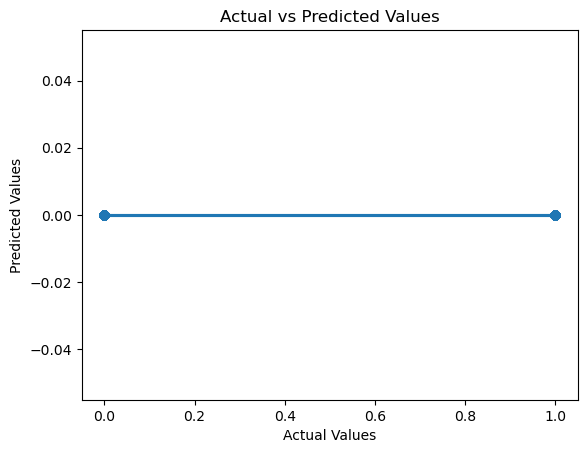

In [438]:
sns.regplot(x=y_test, y=log_reg.predict(X_test))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Summary

Overall, some of the models performed similarly, particularly the logistic, rbf, linear and sigmoid models had the same test accuracy of 88.76%.  KNN performed better for the training dataset, but performed worse on the test accuracy, possibly due to overfitting.  The decision tree accuracy also performed better on the training dateset, but performed worse on the test accuracy.

# Logistic Regression
Very fast run time <1s with high training accuracy and higher testing accuracy.

# KNN Nearest Neighbors
Fastest run time <1s and had slightly higher training versus testing accuracy, possibly due to overfitting.

# Decision Tree Depth
Very fast run time <1s with similar training accuracy and testing accuracy.

# RBF
Run time of about 3s with similar training accuracy and testing accuracy.

# Linear
Slower run time of about 10s with similar training accuracy and testing accuracy.

# Sigmoid 
Run time of < 2s with similar training accuracy and testing accuracy.


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [443]:
# encode last contact and outcome of previous campaign

df['month_encoded'] = le.fit_transform(df['month'])
df['poutcome_encoded'] = le.fit_transform(df['poutcome'])

In [445]:
# Create training and testing data set from bank information features

X_train2, X_test2, y_train2, y_test2 = train_test_split(df[['age',\
                                                        'job_encoded',\
                                                        'marital_encoded',\
                                                        'education_encoded',\
                                                        'default_encoded',\
                                                        'housing_encoded',\
                                                        'loan_encoded',\
                                                        'month_encoded',\
                                                        'duration',\
                                                        'campaign',\
                                                        'previous',\
                                                        'poutcome_encoded',\
                                                        'emp.var.rate',\
                                                        'cons.price.idx',\
                                                        'cons.conf.idx',\
                                                        'euribor3m',\
                                                        'nr.employed']], df['y_encoded'], test_size = 0.3, random_state = 42)

In [447]:
# Run logistic regression and track timing

log_reg_start_time = datetime.datetime.now()
log_reg = LogisticRegression(max_iter=5000).fit(X_train2, y_train2)
log_reg_end_time = datetime.datetime.now()
log_time = log_reg_end_time - log_reg_start_time

# Evaluate accuracy on training and test data set

log_train_accuracy = accuracy_score(log_reg.predict(X_train2), y_train2)
log_test_accuracy = accuracy_score(log_reg.predict(X_test2), y_test2)
log_test_accuracy

0.9091203366512908

In [449]:
### KNN, how many optimal neighbors

knn = KNeighborsClassifier(n_neighbors=3)

# Define parameter grid with different 'n_neighbors' values

param_grid = {'n_neighbors': [36, 37, 38, 39, 40, 41, 42, 43, 44]}

# Perform GridSearchCV

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5) 

# Fit the model on your training data

grid_search.fit(X_train2, y_train2) 
grid_search.cv_results_

{'mean_fit_time': array([0.00445919, 0.00343795, 0.00333562, 0.00334687, 0.00329618,
        0.00333667, 0.00336404, 0.00326757, 0.00328259]),
 'std_fit_time': array([2.10695853e-03, 8.16733667e-05, 7.38510699e-05, 8.54211414e-05,
        6.41983630e-05, 4.36411517e-05, 3.74608321e-05, 4.22482566e-05,
        2.66953867e-05]),
 'mean_score_time': array([0.18236322, 0.19482808, 0.18204942, 0.1839592 , 0.18263779,
        0.18679767, 0.21030922, 0.19298282, 0.19206176]),
 'std_score_time': array([0.00571393, 0.01525743, 0.00148595, 0.00305803, 0.0019527 ,
        0.00359849, 0.01355805, 0.00572959, 0.00280472]),
 'param_n_neighbors': masked_array(data=[36, 37, 38, 39, 40, 41, 42, 43, 44],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value=999999),
 'params': [{'n_neighbors': 36},
  {'n_neighbors': 37},
  {'n_neighbors': 38},
  {'n_neighbors': 39},
  {'n_neighbors': 40},
  {'n_neighbors': 41},
  {'n_neighbors': 42},
 

In [451]:
knn_reg_start_time = datetime.datetime.now()
knn_reg = KNeighborsClassifier(n_neighbors=42).fit(X_train2, y_train2)
knn_reg_end_time = datetime.datetime.now()
knn_time = knn_reg_end_time - knn_reg_start_time
knn_train_accuracy = accuracy_score(knn_reg.predict(X_train2), y_train2)
knn_test_accuracy = accuracy_score(knn_reg.predict(X_test2), y_test2)
knn_test_accuracy

0.90928218823339

In [453]:
# DTC, what is the optimal depth

dtc = DecisionTreeClassifier()

# Define parameter grid with different 'n_neighbors' values

param_grid = {'max_depth': [3, 4, 5, 6, 7]}

# Perform GridSearchCV

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5) 

# Fit the model on your training data

grid_search.fit(X_train2, y_train2) 
grid_search.cv_results_

{'mean_fit_time': array([0.02545352, 0.02925038, 0.03567438, 0.04219241, 0.04813681]),
 'std_fit_time': array([0.00486448, 0.00023348, 0.00023768, 0.00016618, 0.00054488]),
 'mean_score_time': array([0.00163102, 0.00160351, 0.00157747, 0.0016428 , 0.00165095]),
 'std_score_time': array([4.31174816e-04, 1.32236152e-05, 2.07073639e-05, 3.85730315e-05,
        3.19433209e-05]),
 'param_max_depth': masked_array(data=[3, 4, 5, 6, 7],
              mask=[False, False, False, False, False],
        fill_value=999999),
 'params': [{'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7}],
 'split0_test_score': array([0.90289579, 0.9080978 , 0.908618  , 0.90671059, 0.9080978 ]),
 'split1_test_score': array([0.90842872, 0.91241762, 0.91640652, 0.91311134, 0.91397849]),
 'split2_test_score': array([0.90929587, 0.91328477, 0.91241762, 0.91050989, 0.9117239 ]),
 'split3_test_score': array([0.91207076, 0.91814083, 0.91987513, 0.9157128 , 0.91432536]),
 'split4

In [455]:
# Create Decision Tree and track timing and accuracy

dec_reg_start_time = datetime.datetime.now()
dec_reg = DecisionTreeClassifier(max_depth=5).fit(X_train2, y_train2)
dec_reg_end_time = datetime.datetime.now()
dec_time = dec_reg_end_time - dec_reg_start_time
dec_train_accuracy = accuracy_score(dec_reg.predict(X_train2), y_train2)
dec_test_accuracy = accuracy_score(dec_reg.predict(X_test2), y_test2)
dec_test_accuracy

0.9155134741442098

In [457]:
# Do RBF grid search to find optimal gamma

params = {'kernel': ['rbf'],
         'gamma': [0.00001, 0.0001, 0.001]}
grid = GridSearchCV(SVC(), param_grid=params).fit(X_train2, y_train2)
grid_score = grid.score(X_test2, y_test2)
grid.cv_results_

{'mean_fit_time': array([2.49176469, 2.77623205, 3.07356601]),
 'std_fit_time': array([0.04543744, 0.04265878, 0.03034357]),
 'mean_score_time': array([0.82928891, 0.81943121, 0.97008357]),
 'std_score_time': array([0.00561465, 0.00430576, 0.00466886]),
 'param_gamma': masked_array(data=[1e-05, 0.0001, 0.001],
              mask=[False, False, False],
        fill_value=1e+20),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 1e-05, 'kernel': 'rbf'},
  {'gamma': 0.0001, 'kernel': 'rbf'},
  {'gamma': 0.001, 'kernel': 'rbf'}],
 'split0_test_score': array([0.90358939, 0.90445639, 0.90272239]),
 'split1_test_score': array([0.90738814, 0.90790843, 0.90634755]),
 'split2_test_score': array([0.90721471, 0.90721471, 0.90617412]),
 'split3_test_score': array([0.90998959, 0.91397849, 0.91137704]),
 'split4_test_score': array([0.90513354, 0.90617412, 0.90253208]),
 'mean_te

In [459]:
# Run RBF SVC using optimal gamma of 0.0001
# and keep track of timing and acuracy

rbf_start_time = datetime.datetime.now()
rbf_mod = SVC(kernel='rbf', gamma=0.0001).fit(X_train2,y_train2)
rbf_end_time = datetime.datetime.now()
rbf_time = rbf_end_time - rbf_start_time
rbf_train_accuracy = accuracy_score(rbf_mod.predict(X_train2), y_train2)
rbf_test_accuracy = accuracy_score(rbf_mod.predict(X_test2), y_test2)
rbf_test_accuracy

0.9103342235170349

In [461]:
# Do linear grid search to find optimal gamma

params = {'kernel': ['linear'],
         'gamma': [0.01, 0.1, 1.0]}
grid = GridSearchCV(SVC(), param_grid=params).fit(X_train2, y_train2)
grid_score = grid.score(X_test2, y_test2)
grid.cv_results_

{'mean_fit_time': array([9.50739398, 9.40399399, 9.40368991]),
 'std_fit_time': array([1.49103708, 1.46703909, 1.46459556]),
 'mean_score_time': array([0.17300868, 0.17078347, 0.17215695]),
 'std_score_time': array([0.0052986 , 0.00255712, 0.00214043]),
 'param_gamma': masked_array(data=[0.01, 0.1, 1.0],
              mask=[False, False, False],
        fill_value=1e+20),
 'param_kernel': masked_array(data=['linear', 'linear', 'linear'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.01, 'kernel': 'linear'},
  {'gamma': 0.1, 'kernel': 'linear'},
  {'gamma': 1.0, 'kernel': 'linear'}],
 'split0_test_score': array([0.90185538, 0.90185538, 0.90185538]),
 'split1_test_score': array([0.90357267, 0.90357267, 0.90357267]),
 'split2_test_score': array([0.89542144, 0.89542144, 0.89542144]),
 'split3_test_score': array([0.90478668, 0.90478668, 0.90478668]),
 'split4_test_score': array([0.90426639, 0.90426639, 0.90426639]),
 'm

In [463]:
# Do linear SVC using optinal gamma of 0.01
# and keep track of timing and acuracy

lin_start_time = datetime.datetime.now()
lin_mod = SVC(kernel='linear', gamma=0.01).fit(X_train2,y_train2)
lin_end_time = datetime.datetime.now()
lin_time = lin_end_time - lin_start_time
lin_train_accuracy = accuracy_score(lin_mod.predict(X_train2), y_train2)
lin_test_accuracy = accuracy_score(lin_mod.predict(X_test2), y_test2)
lin_test_accuracy

0.9044266407704136

In [464]:
# Do sigmoid grid search to find optimal gamma

params = {'kernel': ['sigmoid'],
         'gamma': [0.1, 1.0, 10]}
grid = GridSearchCV(SVC(), param_grid=params).fit(X_train2, y_train2)
grid_score = grid.score(X_test2, y_test2)
grid.cv_results_

{'mean_fit_time': array([1.51539545, 1.53296704, 1.47287083]),
 'std_fit_time': array([0.031866  , 0.02784814, 0.00079671]),
 'mean_score_time': array([0.33436918, 0.33547578, 0.33703022]),
 'std_score_time': array([0.00089919, 0.0012123 , 0.00027049]),
 'param_gamma': masked_array(data=[0.1, 1.0, 10.0],
              mask=[False, False, False],
        fill_value=1e+20),
 'param_kernel': masked_array(data=['sigmoid', 'sigmoid', 'sigmoid'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 0.1, 'kernel': 'sigmoid'},
  {'gamma': 1.0, 'kernel': 'sigmoid'},
  {'gamma': 10, 'kernel': 'sigmoid'}],
 'split0_test_score': array([0.88711635, 0.88711635, 0.88711635]),
 'split1_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split2_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split3_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'split4_test_score': array([0.8872702, 0.8872702, 0.8872702]),
 'mean_test

In [467]:
# Do sigmoid SVC using optimal gamma of 0.1
# and keep track of timing and acuracy

sig_start_time = datetime.datetime.now()
sig_mod = SVC(kernel='sigmoid', gamma=0.1).fit(X_train2,y_train2)
sig_end_time = datetime.datetime.now()
sig_time = sig_end_time - sig_start_time
sig_train_accuracy = accuracy_score(sig_mod.predict(X_train2), y_train2)
sig_test_accuracy = accuracy_score(sig_mod.predict(X_test2), y_test2)
sig_test_accuracy

0.8875940762320952

In [469]:
#params = {'kernel': ['poly'],
#         'gamma': [0.1]}
#grid = GridSearchCV(SVC(), param_grid=params).fit(X_train, y_train)
#grid_score = grid.score(X_test, y_test)
#poly_time = poly_end_time - poly_start_time
#grid.cv_results_

In [471]:
model2 = ["logistic", "KNN", "decision tree", "rbf", "linear", "sigmoid", "poly"]
train_time2 = [log_time, knn_time, dec_time, rbf_time, lin_time, sig_time, "N/A"]
train_accuracy2 = [log_train_accuracy, knn_train_accuracy, dec_train_accuracy, \
                  rbf_train_accuracy, lin_train_accuracy, sig_train_accuracy, "N/A"]
test_accuracy2 = [log_test_accuracy, knn_test_accuracy, dec_test_accuracy, \
                 rbf_test_accuracy, lin_test_accuracy, sig_test_accuracy, "N/A"]
results_dict2 = {'Model': model2, 'Train Time': train_time2, 'Train Accuracy': train_accuracy2, 'Test Accuracy': test_accuracy2}
results2 = pd.DataFrame(results_dict2)

In [473]:
results

,Model,Train Time,Train Accuracy,Test Accuracy
0,logistic,0:00:00.148627,0.887239,0.887594
1,KNN,0:00:00.019516,0.890014,0.887189
2,decision tree,0:00:00.021877,0.887725,0.887675
3,rbf,0:00:03.175321,0.887239,0.887594
4,linear,0:00:10.822758,0.887239,0.887594
5,sigmoid,0:00:01.827863,0.887239,0.887594
6,poly,N/A,N/A,N/A


In [475]:
results2

,Model,Train Time,Train Accuracy,Test Accuracy
0,logistic,0:00:07.487675,0.907495,0.90912
1,KNN,0:00:00.012727,0.911172,0.909282
2,decision tree,0:00:00.060066,0.916652,0.915513
3,rbf,0:00:04.188927,0.910478,0.910334
4,linear,0:00:09.184172,0.903125,0.904427
5,sigmoid,0:00:02.317163,0.887239,0.887594
6,poly,N/A,N/A,N/A


In [481]:
pd.DataFrame(dec_reg.predict(X_test2)).value_counts()

0
0    11276
1     1081
Name: count, dtype: int64

In [485]:
y_test2.value_counts()

y_encoded
0    10968
1     1389
Name: count, dtype: int64

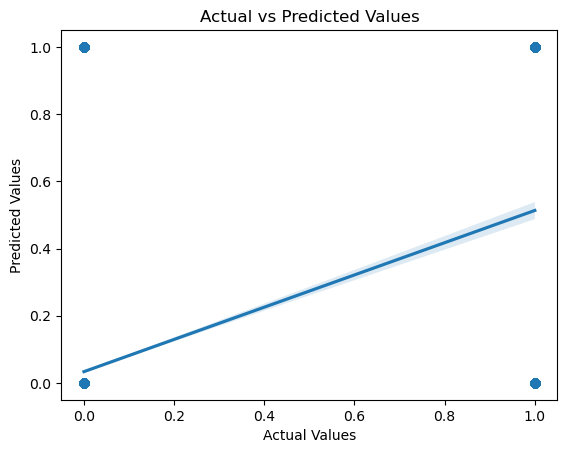

In [477]:
sns.regplot(x=y_test2, y=dec_reg.predict(X_test2))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

# Summary

I decided to add additional features that included the marketing last contact month of year, the marketing last contact duration, the marketing number of contacts performed during this campaign, the marketing number of contacts performed before this campaign, the outcome of the previous marketing campaign, the quarterly employment variation rate, the monthly consumer price index, the monthly 
consumer confidence index, the euribor 3 month rate - daily indicator, and the number of unemployed quarterly indicator.  

# Logistic Regression
I had to tweak the maximum number of iterations to 5000 for the run to complerte without any warnings.

# KNN Nearest Neighbors
I used GridSearchCV using several ranges of values and after some iterations found 42 to be the optimal, which was surprisingly vary high.

# Decision Tree Depth
I used GridSearchCV using 3, 4, 5, 6, and 7 as values for the depth of the decision tree and found 5 to be the optimal.

# RBF
I used GridSearchCV using 0.0001, 0.001, 0.01 as values for gamma and found 0.0001 to be optimal.

# Linear
I used GridSearchCV using 0.01, 0.1, 1.0 as values for gamma and found all to be equally optimal

# Sigmoid 
I used GridSearchCV using 0.1, 1.0, 10 as values for gamma and found all to be equally optimal

Overall there was a lift in test validation accuracy using the best performing decision tree model with depth = 5.  This model performed 3% better than the models that did not include the additional features in the training/test data set.


##### Questions